# Training 
## Non-Fast Food Only

This notebook finds the best parameters for each of the different classifiers that achieve the maximuma accuracy.

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = pd.read_pickle('x.pkl')
y = pd.read_pickle('y.pkl')

# Pick Non Fast Food places only

In [3]:
x = pd.read_pickle('x.pkl')
y = pd.read_pickle('y.pkl')

In [4]:
df = x.copy()
df['is_closed'] = y
df = df[df['is_fastfood'] == False]
x = df.copy()
del x['is_closed']
y = df['is_closed'].copy()

# Train Test Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10,\
                                                    stratify = y)

In [6]:
def train_and_test(clf=DecisionTreeClassifier()):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    try:
        result = dict()
        result['accuracy']  = clf.score(x_test, y_test)
        result['precision'] = precision_score(y_test, y_pred)
        result['recall']    = recall_score(y_test,y_pred)
        result['f1']        = f1_score(y_test.values,y_pred)
        result['matrix']    = confusion_matrix(y_test.values, y_pred)
        dt_scores = cross_val_score(clf, x_train, y_train, cv=10)
        result['cval_score'] = np.mean(dt_scores)
        result['score'] = clf.predict_proba(x_test)[:,1]
        try:
            result['imp_features'] = clf.feature_importances_
        except:
            result['imp_features'] = None
        return result
    except UndefinedMetricWarning:
        return None

# DECISION TREES

In [7]:
criterions = ['entropy', 'gini']
splitters = ['random', 'best']
depths = [5, 10, None]
min_samples_splits = [0.50, 0.25, 2]
min_samples_leafs = [1, 10]

In [8]:
results = []
for c, s, d, mss, msl in list(itertools.product(criterions, splitters, depths, min_samples_splits, min_samples_leafs)):
    clf = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=d, min_samples_split=mss, min_samples_leaf=msl)
    result = train_and_test(clf)
    if result is not None:
        result['criterion'] = c
        result['splitter'] = s
        result['depth'] = d
        result['mss'] = mss
        result['msl'] = msl
        results.append(result)

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

In [9]:
tree_df = pd.DataFrame.from_dict(results)
tree_df.head()

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,precision,recall,score,splitter
0,0.711986,entropy,0.709297,5.0,0.000000,"[0.0, 0.364223274215, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[398, 0], [161, 0]]",1,0.50,0.000000,0.000000,"[0.245714285714, 0.245714285714, 0.39487726787...",random
1,0.711986,entropy,0.718695,5.0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[398, 0], [161, 0]]",10,0.50,0.000000,0.000000,"[0.255555555556, 0.255555555556, 0.39487726787...",random
2,0.765653,entropy,0.733000,5.0,0.360976,"[0.0, 0.583101496769, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[391, 7], [124, 37]]",1,0.25,0.840909,0.229814,"[0.134575569358, 0.434250764526, 0.37404580152...",random
3,0.735242,entropy,0.733505,5.0,0.471429,"[0.0, 0.0, 0.0, 0.0, 0.0562465285487, 0.0, 0.0...","[[345, 53], [95, 66]]",10,0.25,0.554622,0.409938,"[0.348214285714, 0.162337662338, 0.5337995338,...",random
4,0.792487,entropy,0.734314,5.0,0.539683,"[0.0, 0.431768566463, 0.0, 0.0, 0.005996076506...","[[375, 23], [93, 68]]",1,2.00,0.747253,0.422360,"[0.36, 0.724637681159, 0.366141732283, 0.36614...",random


In [10]:
tree_df.loc[[tree_df['accuracy'].idxmax(), tree_df['precision'].idxmax(), tree_df['cval_score'].idxmax()]]

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,precision,recall,score,splitter
18,0.813953,entropy,0.760692,5.0,0.603053,"[0.0, 0.865672621656, 0.0, 0.0, 0.134327378344...","[[376, 22], [82, 79]]",1,0.50,0.782178,0.490683,"[0.0735294117647, 0.649746192893, 0.1674958540...",best
2,0.765653,entropy,0.733000,5.0,0.360976,"[0.0, 0.583101496769, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[391, 7], [124, 37]]",1,0.25,0.840909,0.229814,"[0.134575569358, 0.434250764526, 0.37404580152...",random
54,0.813953,gini,0.762485,5.0,0.584000,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[382, 16], [88, 73]]",1,0.50,0.820225,0.453416,"[0.117391304348, 0.68221574344, 0.309352517986...",best


# RandomForestClassifier

In [11]:
n_estimators_list = [5, 10, 15, 20]
criterions = ['entropy', 'gini']
depths = [5, 10, None]
min_samples_splits = [0.50, 0.25, 2]
min_samples_leafs = [1, 10]

In [12]:
results = []
for nest, c, d, mss, msl in list(itertools.product(n_estimators_list, criterions, depths, min_samples_splits, min_samples_leafs)):
    clf = RandomForestClassifier(n_estimators=nest, criterion=c, max_depth=d, min_samples_split=mss, min_samples_leaf=msl)
    result = train_and_test(clf)
    if result is not None:
        result['n_estimators'] = nest
        result['criterion'] = c
        result['depth'] = d
        result['mss'] = mss
        result['msl'] = msl
        results.append(result)

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/balaji/anaconda/lib/python3.6/site-packages/sklea

In [13]:
rf_df = pd.DataFrame.from_dict(results)
rf_df.head()

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,n_estimators,precision,recall,score
0,0.711986,entropy,0.715548,5.0,0.000000,"[0.0, 0.367542572464, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[398, 0], [161, 0]]",1,0.50,5,0.000000,0.000000,"[0.249084467029, 0.465473857175, 0.27697226331..."
1,0.711986,entropy,0.712436,5.0,0.000000,"[0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[398, 0], [161, 0]]",10,0.50,5,0.000000,0.000000,"[0.301163405318, 0.328365326468, 0.32836532646..."
2,0.744186,entropy,0.719107,5.0,0.266667,"[0.0, 0.397311695626, 0.0232830736824, 0.02455...","[[390, 8], [135, 26]]",1,0.25,5,0.764706,0.161491,"[0.30829137625, 0.384118671597, 0.305883079843..."
3,0.711986,entropy,0.720464,5.0,0.000000,"[0.0, 0.286917798975, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[398, 0], [161, 0]]",10,0.25,5,0.000000,0.000000,"[0.227472639838, 0.430163319568, 0.40260835016..."
4,0.772809,entropy,0.744576,5.0,0.409302,"[0.0310654328043, 0.290568855685, 0.0551019015...","[[388, 10], [117, 44]]",1,2.00,5,0.814815,0.273292,"[0.131314847509, 0.430907984532, 0.29953213726..."


In [14]:
rf_df.loc[[rf_df['accuracy'].idxmax(), rf_df['precision'].idxmax(), rf_df['cval_score'].idxmax()]]

,accuracy,criterion,cval_score,depth,f1,imp_features,matrix,msl,mss,n_estimators,precision,recall,score
143,0.824687,gini,0.767847,NaN,0.608000,"[0.0201334773323, 0.353198762611, 0.0514681098...","[[385, 13], [85, 76]]",10,2.00,20,0.853933,0.472050,"[0.259638519323, 0.61691263768, 0.348682465349..."
20,0.713775,gini,0.726326,5.0,0.012346,"[0.0, 0.261014196133, 0.0, 0.0, 0.116410342068...","[[398, 0], [160, 1]]",1,0.25,5,1.000000,0.006211,"[0.275791234669, 0.295960150866, 0.35383177166..."
52,0.785331,entropy,0.779898,NaN,0.520000,"[0.031807369837, 0.188401133916, 0.05275085795...","[[374, 24], [96, 65]]",1,2.00,10,0.730337,0.403727,"[0.3, 0.5, 0.5, 0.4, 0.3, 0.0, 0.7, 0.2, 0.6, ..."


# AdaBoost

In [15]:
base_estimators=[None, RandomForestClassifier()]
n_estimators_list=[10, 30, 50, 100, 200]
learning_rate=[0.1, 0.5, 1.0]

In [16]:
results = []
for est, nest, lr in list(itertools.product(base_estimators, n_estimators_list, learning_rate)):
    clf = AdaBoostClassifier(base_estimator=est, n_estimators=nest, learning_rate=lr)
    result = train_and_test(clf)
    if result is not None:
        result['n_estimators'] = nest
        result['base_estimator'] = est 
        result['lr'] = lr
        results.append(result)

In [17]:
adaboost_df = pd.DataFrame.from_dict(results)
adaboost_df.head()

,accuracy,base_estimator,cval_score,f1,imp_features,lr,matrix,n_estimators,precision,recall,score
0,0.813953,None,0.765608,0.584000,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1,"[[382, 16], [88, 73]]",10,0.820225,0.453416,"[0.22531196549, 0.56111026571, 0.362558493, 0...."
1,0.803220,None,0.766958,0.552846,"[0.0, 0.6, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, ...",0.5,"[[381, 17], [93, 68]]",10,0.800000,0.422360,"[0.416062435868, 0.522647919098, 0.45307955213..."
2,0.813953,None,0.777260,0.631206,"[0.0, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",1.0,"[[366, 32], [72, 89]]",10,0.735537,0.552795,"[0.463648156715, 0.544375416298, 0.46868264100..."
3,0.799642,None,0.769204,0.525424,"[0.0, 0.666666666667, 0.1, 0.0, 0.1, 0.0, 0.0,...",0.1,"[[385, 13], [99, 62]]",30,0.826667,0.385093,"[0.366450431491, 0.524149197547, 0.42432066465..."
4,0.801431,None,0.775914,0.574713,"[0.0, 0.333333333333, 0.0666666666667, 0.0, 0....",0.5,"[[373, 25], [86, 75]]",30,0.750000,0.465839,"[0.476956994526, 0.505104153574, 0.47912293793..."


In [18]:
adaboost_df.loc[[adaboost_df['accuracy'].idxmax(), adaboost_df['precision'].idxmax(), adaboost_df['cval_score'].idxmax()]]

,accuracy,base_estimator,cval_score,f1,imp_features,lr,matrix,n_estimators,precision,recall,score
22,0.817531,"RandomForestClassifier(bootstrap=True, class_w...",0.767902,0.613636,"[0.0295295790271, 0.135316135424, 0.0448262157...",0.5,"[[376, 22], [80, 81]]",50,0.786408,0.503106,"[0.372127595649, 0.738926247577, 0.4339264364,..."
21,0.801431,"RandomForestClassifier(bootstrap=True, class_w...",0.768759,0.515284,"[0.0371456786974, 0.139230415499, 0.0459997754...",0.1,"[[389, 9], [102, 59]]",50,0.867647,0.366460,"[0.183002997047, 0.562050728568, 0.18167102034..."
13,0.806798,None,0.783966,0.611511,"[0.01, 0.23, 0.055, 0.035, 0.02, 0.045, 0.035,...",0.5,"[[366, 32], [76, 85]]",200,0.726496,0.527950,"[0.496811682427, 0.500830143494, 0.49726932195..."


# K-Nearest Neighbor
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [19]:
n_neighbors=[3, 5, 10, 20, 50]
leaf_size=[5, 10, 30, 50]
weights = ['uniform', 'distance']
ps=[1, 2]

In [20]:
results = []
for n, ls, w, p in list(itertools.product(n_neighbors, leaf_size, weights, ps)):
    clf = KNeighborsClassifier(n_neighbors=n, leaf_size=ls, weights=w, p=p)
    result = train_and_test(clf)
    if result is not None:
        result['n_neighbor'] = n
        result['leaf_size'] = ls
        result['p'] = p
        results.append(result)

In [21]:
knn_df = pd.DataFrame.from_dict(results)
knn_df.head()

,accuracy,cval_score,f1,imp_features,leaf_size,matrix,n_neighbor,p,precision,recall,score
0,0.665474,0.682015,0.366102,None,5,"[[318, 80], [107, 54]]",3,1,0.402985,0.335404,"[0.333333333333, 0.333333333333, 0.33333333333..."
1,0.677996,0.684237,0.387755,None,5,"[[322, 76], [104, 57]]",3,2,0.428571,0.354037,"[0.0, 0.333333333333, 0.333333333333, 0.666666..."
2,0.679785,0.686003,0.420712,None,5,"[[315, 83], [96, 65]]",3,1,0.439189,0.403727,"[0.184097969175, 0.238958293533, 0.43593819861..."
3,0.695886,0.693174,0.448052,None,5,"[[320, 78], [92, 69]]",3,2,0.469388,0.428571,"[0.0, 0.220804885245, 0.460661832991, 0.642341..."
4,0.665474,0.682459,0.366102,None,10,"[[318, 80], [107, 54]]",3,1,0.402985,0.335404,"[0.333333333333, 0.333333333333, 0.33333333333..."


In [22]:
knn_df.loc[[knn_df['accuracy'].idxmax(), knn_df['precision'].idxmax(), knn_df['cval_score'].idxmax()]]

,accuracy,cval_score,f1,imp_features,leaf_size,matrix,n_neighbor,p,precision,recall,score
50,0.733453,0.721365,0.371308,None,5,"[[366, 32], [117, 44]]",20,1,0.578947,0.273292,"[0.234158141881, 0.34415528913, 0.325909703064..."
64,0.717352,0.716464,0.081395,None,5,"[[394, 4], [154, 7]]",50,1,0.636364,0.043478,"[0.28, 0.44, 0.3, 0.32, 0.22, 0.34, 0.18, 0.28..."
66,0.722719,0.726734,0.228856,None,5,"[[381, 17], [138, 23]]",50,1,0.575000,0.142857,"[0.244204801657, 0.409838728668, 0.29768479051..."


# Gaussian Naive Bayes
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [23]:
clf = GaussianNB()
result = train_and_test(clf)

In [24]:
nb_df = pd.DataFrame.from_dict([result])
nb_df.head()

,accuracy,cval_score,f1,imp_features,matrix,precision,recall,score
0,0.70483,0.709345,0.377358,None,"[[344, 54], [111, 50]]",0.480769,0.310559,"[0.157985372162, 0.443146301328, 0.42470616116..."


In [25]:
nb_df.loc[[nb_df['accuracy'].idxmax(), nb_df['precision'].idxmax(), nb_df['cval_score'].idxmax()]]

,accuracy,cval_score,f1,imp_features,matrix,precision,recall,score
0,0.70483,0.709345,0.377358,None,"[[344, 54], [111, 50]]",0.480769,0.310559,"[0.157985372162, 0.443146301328, 0.42470616116..."
0,0.70483,0.709345,0.377358,None,"[[344, 54], [111, 50]]",0.480769,0.310559,"[0.157985372162, 0.443146301328, 0.42470616116..."
0,0.70483,0.709345,0.377358,None,"[[344, 54], [111, 50]]",0.480769,0.310559,"[0.157985372162, 0.443146301328, 0.42470616116..."


---

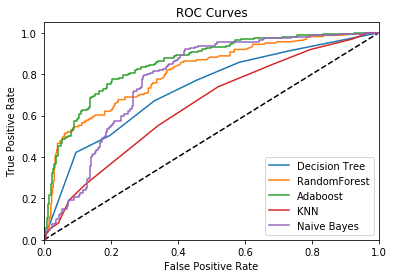

In [26]:
#ROC Curve
y_score_tree = tree_df.loc[51, 'score']
y_score_rf = rf_df.loc[97, 'score']
y_score_ab = adaboost_df.loc[20, 'score']
y_score_knn = knn_df.loc[56, 'score']
y_score_nb = nb_df.loc[0, 'score']
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test,y_score_rf)
fpr_ab, tpr_ab, _ = roc_curve(y_test,y_score_ab)
fpr_knn, tpr_knn, _ = roc_curve(y_test,y_score_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test,y_score_nb)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr_tree,tpr_tree,label='Decision Tree')
plt.plot(fpr_rf,tpr_rf,label='RandomForest')
plt.plot(fpr_ab,tpr_ab,label='Adaboost')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [27]:
importances = dict()
importances['tree'] = tree_df.loc[51, 'imp_features']
importances['rf'] = rf_df.loc[97, 'imp_features']
importances['ab'] = adaboost_df.loc[20, 'imp_features']
importances['knn'] = knn_df.loc[56, 'imp_features']
importances['nb'] = nb_df.loc[0, 'imp_features']

for k, imp in importances.items():
    if imp is None:
        continue
    indices = np.argsort(imp)[::-1]
    print("Feature ranking: {}".format(k))
    for f in range(20):
        print("%d. %s (%f)" % (f + 1, x.iloc[:,indices[f]].name, imp[indices[f]]))

Feature ranking: tree
1. GoodForMeal.dinner (0.389132)
2. GoodForMeal.breakfast (0.282635)
3. review_count (0.134201)
4. is_chain (0.092895)
5. GoodForMeal.lunch (0.055696)
6. 1m_count (0.045442)
7. cuisine_y (0.000000)
8. Ambience.touristy (0.000000)
9. Ambience.romantic (0.000000)
10. Ambience.intimate (0.000000)
11. Ambience.hipster (0.000000)
12. Ambience.divey (0.000000)
13. Ambience.classy (0.000000)
14. Ambience.casual (0.000000)
15. Alcohol (0.000000)
16. price_ordinal (0.000000)
17. income (0.000000)
18. Ambience.upscale (0.000000)
19. is_fastfood (0.000000)
20. 3m_count_similar (0.000000)
Feature ranking: rf
1. review_count (0.296293)
2. GoodForMeal.lunch (0.200000)
3. GoodForMeal.dinner (0.124739)
4. 1m_count (0.066667)
5. Ambience.casual (0.066667)
6. is_chain (0.066667)
7. 3m_count (0.055397)
8. RestaurantsPriceRange2 (0.052917)
9. rating (0.020882)
10. GoodForMeal.breakfast (0.011764)
11. GoodForMeal.latenight (0.008595)
12. 0.5m_count (0.007772)
13. 2m_count (0.007467)
1

TypeError: unhashable type: 'numpy.ndarray'

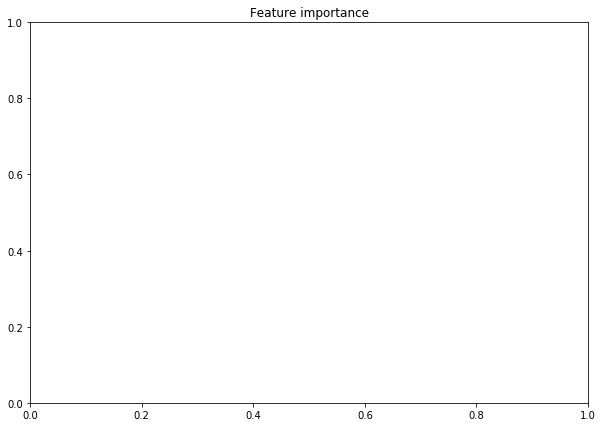

In [28]:
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(x_test.shape[1])[:10], importances[indices][:10],align="center")
plt.yticks(range(x_test.shape[1])[:10], x.iloc[:,indices].columns)
plt.ylim([-1, 10])